# 1. Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 2. Data Collection

In [4]:
# Load the dataset
df = pd.read_csv("C:/Users/User/Code-Clause/Wine Quality Prediction/winequality-red.csv")

# 3. Data Analysis and Visualization

In [5]:
# Checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 4. Statistical measures of the dataset

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


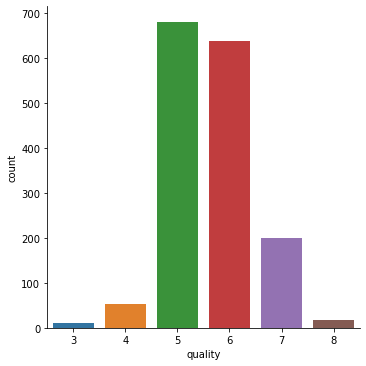

In [7]:
# Number of values for each quality
sns.catplot(x='quality', data=df, kind='count')


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

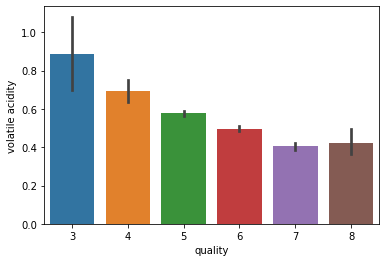

In [8]:
# Volatile acidity vs Quality
sns.barplot(x='quality', y='volatile acidity', data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

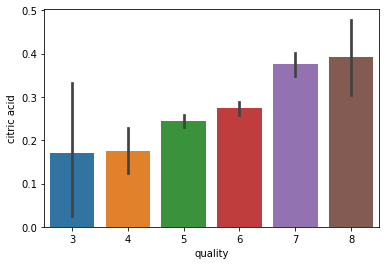

In [9]:
# Citric acid vs Quality
sns.barplot(x='quality', y='citric acid', data=df)

# 5. Correlation

<AxesSubplot:>

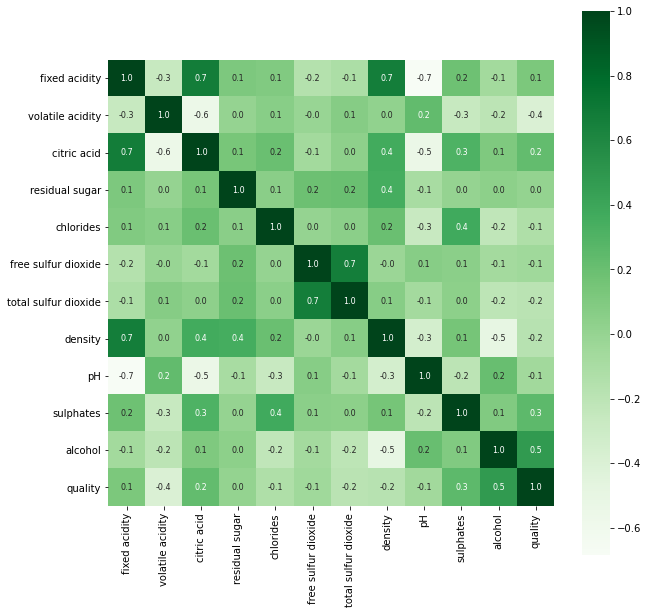

In [11]:
correlation = df.corr()

# Constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Greens')


# 6. Data Preprocessing

In [12]:
# Separate the data and Label
X = df.drop('quality', axis=1)
Y = df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

# 7. Train & Test Split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)


# 8. Model Training: Random Forest Classifier

In [14]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

# 9. Model Evaluation: Accuracy Score

In [15]:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print('Model Accuracy: ', test_data_accuracy)


Model Accuracy:  0.934375


In [19]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
986,9.8,0.340,0.39,1.4,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,7
824,7.1,0.480,0.28,2.8,0.068,6.0,16.0,0.99682,3.24,0.53,10.3,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6
765,9.2,0.670,0.10,3.0,0.091,12.0,48.0,0.99888,3.31,0.54,9.5,6
122,7.3,0.695,0.00,2.5,0.075,3.0,13.0,0.99800,3.49,0.52,9.2,5


# 10. Building a Predictive System

In [20]:
# Define a function for result checking
def check_wine_quality(input_data):
    input_data_as_np = np.asarray(input_data)
    input_data_reshaped = input_data_as_np.reshape(1, -1)
    prediction = model.predict(input_data_reshaped)
    return "Good Quality Wine" if prediction[0] == 1 else "Bad Quality Wine"


In [21]:
# Positive Result Checking
positive_input_data = (7.5, 0.520, 0.16, 1.9, 0.085, 12.0, 35.0, 0.99680, 3.38, 0.62, 9.5)
positive_result = check_wine_quality(positive_input_data)
print(positive_result)

Good Quality Wine


In [22]:
# Negative Result Checking
negative_input_data = (7.3, 0.305, 0.39, 1.2, 0.059, 7.0, 11.0, 0.99331, 3.29, 0.52, 11.5)
negative_result = check_wine_quality(negative_input_data)
print(negative_result)

Bad Quality Wine
